In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Question 1

In [ ]:
# Parameters
N = 2000  # Population size
mu, sigma = 5, 1  # Parameters for the normal distribution
n = 250  # Sample size
simulations = 10000  # Number of simulations

# Population setup
population = np.random.normal(mu, sigma, N)
true_mean = np.mean(population)

# Simulation
ht_estimators = []
ht_variances = []

for _ in range(simulations):
    sample = np.random.choice(population, n, replace=False)
    sample_mean = np.mean(sample)
    ht_estimators.append(sample_mean)

    # Variance estimation
    f = n / N  # Finite population correction
    S_squared = np.var(sample, ddof=1)
    ht_variance = ((1 - f) / n) * S_squared
    ht_variances.append(ht_variance)

# Analysis
average_ht_estimator = np.mean(ht_estimators)
empirical_bias = average_ht_estimator - mu
empirical_variance = np.var(ht_estimators)
average_estimated_variance = np.mean(ht_variances)

print(f"population mean = {true_mean:.2f}")
print(f"average HT estimator = {average_ht_estimator:.2f}")
print(f"bias = {true_mean - average_ht_estimator:.2f}")

population mean = 5.02
average HT estimator = 5.02
bias = 0.00


$\frac{1}{R} \sum_{i=1}^R \hat{\mu}_\pi = \mathbb{E}[\hat{\mu}_\pi] = \mu$

Thus we can see that the Horvitz-Thompson estimator is design
unbiased

## Question 2

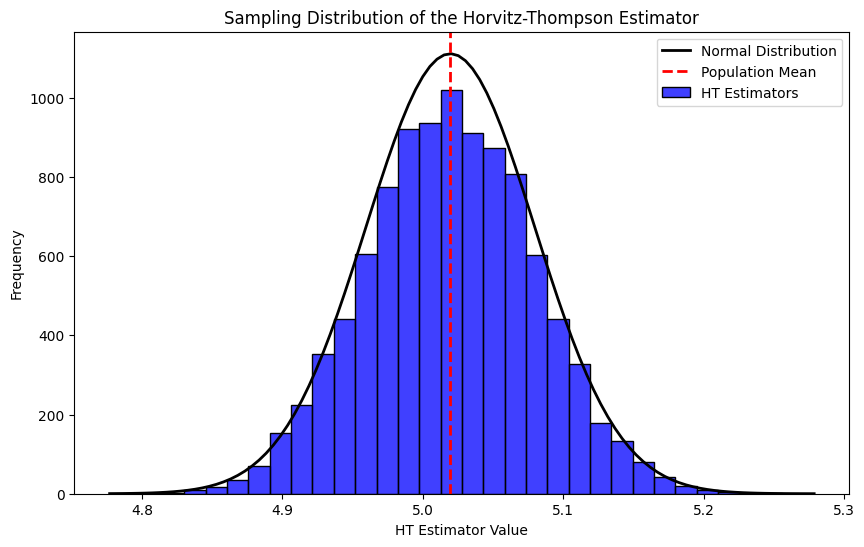

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram of HT estimators
sns.histplot(ht_estimators, bins=30, kde=False, color='blue', label='HT Estimators')

# Overlaying a normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, average_ht_estimator, np.sqrt(empirical_variance))
plt.plot(x, p * simulations * (xmax - xmin) / 30, 'k', linewidth=2, label='Normal Distribution')

# Adding a line for the true mean
plt.axvline(true_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')

# Labels and title
plt.title('Sampling Distribution of the Horvitz-Thompson Estimator')
plt.xlabel('HT Estimator Value')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

 We can see that the sampling distribution of the HT estimator Is approximately
normal

## Question 3

In [ ]:
# Calculate the population mean (y_bar_pi)
population_mean = np.mean(population)

# Calculate the squared differences from the mean (S_y_pi squared)
squared_differences = [(y_k - population_mean)**2 for y_k in population]
S_y_pi_squared = sum(squared_differences) / (N - 1)

# Calculate the sampling fraction (f)
f = n / N

# Calculate the design variance of the HT estimator (V_p_hat_mu_pi)
V_p_hat_mu_pi = (1 - f) * S_y_pi_squared / n

print(f"design variance of the HT estimator = {V_p_hat_mu_pi:.4f}")
print(f"average HT variance estimator = {average_estimated_variance:.4f}")
print(f"bias = {V_p_hat_mu_pi - average_estimated_variance:.4f}")

design variance of the HT estimator = 0.0036
average HT variance estimator = 0.0036
bias = -0.0000


$\frac{1}{R} \sum_{i=1}^R \hat{V}_\pi = \mathbb{E}[\hat{V}_\pi] = V_\pi$

we can see that the Horvitz-Thompson variance estimator is
design unbiased

## Question 4

$CI = [\hat{\mu}_{\pi} \pm z_{\frac{\alpha}{2}} \cdot \sqrt{\hat{V}_{\pi}}]$

In [ ]:
z_score = 1.96  # Z-score for 95% confidence interval
coverage_count = 0

for _ in range(simulations):
    sample = np.random.choice(population, n, replace=False)
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)

    # HT variance estimation
    f = n / N
    ht_variance = ((1 - f) / n) * sample_variance

    # Confidence interval calculation
    lower_bound = sample_mean - z_score * np.sqrt(ht_variance)
    upper_bound = sample_mean + z_score * np.sqrt(ht_variance)

    # Check if true mean is within the confidence interval
    if lower_bound <= true_mean <= upper_bound:
        coverage_count += 1

# Calculate coverage proportion
coverage_proportion = coverage_count / simulations
print(f"coverage proportion = {coverage_proportion:.2f}")

coverage proportion = 0.95


We can see that the coverage is approximately 95% thus correct